# ROC Exploration

By default, scikit-learn's implementation of the ROC curve only runs a coarse sampling of thresholds. In this exercise you will implement an ROC function that allows the user to specify the granularity of thresholds in order to better visualize classifier performance.




In [35]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [36]:
from sklearn.datasets import make_classification
from sklearn import metrics
from sklearn import model_selection as ms
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

We will simply use a default classification dataset in order to test our ROC function.

In [37]:
x, y = make_classification(random_state=41)  # default arguments
x.shape, y.shape

((100, 20), (100,))

In [38]:
x_train, x_test, y_train, y_test = ms.train_test_split(x, y)

And use a logistic regression classifier

In [39]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [40]:
y_predictions = logreg.predict(x_test)
scores=logreg.predict_proba(x_test)

# Exercise:
Complete the two functions below to calculate the ROC

In [41]:
def get_conf_metrics(scores, y, thr):
    """
    Calculate the cells of the confusion matrix for a given threshold. This might be useful in calculating ROC.
    Assume class 1 is the "positive" class, class 0 is the "negative" class. 
    y_scores: continuous (unthresholded) output of classifier- e.g. .decision_function(). np array
    y: labels (np array- assume it is always 0's and 1's)
    thr: threshold (scalar)
    return:
    fp: false positive count
    tp: true positive count
    tn: true negative count
    fn: false negative count
    """
    #y = y_test
    fp = 0
    for i in range(len(y)):
        if (scores[i] >= thr) and (y[i] == 0):
            fp += 1
        
    tp = 0
    for i in range(len(y)):
        if (scores[i] >= thr) and (y[i] == 1):
            tp += 1
    
    tn = 0
    for i in range(len(y)):
        if (scores[i] <= thr) and (y[i] == 0):
            tn += 1
            
    fn = 0
    for i in range(len(y)):
        if (scores[i] <= thr) and (y[i] == 1):
            fn += 1

    return fp, tp, tn, fn 

The ROC function below loops through different thresholds and finds the fpr and tpr as calculated above.

In [42]:
def roc(x, y, clf, thr):
    """
    Calculate ROC metrics by looping through thresholds (thr)
    x: data
    y: labels
    clf: fitted classifier
    thr: thresholds
    returns: fprs, tprs (false positive rate and true positive rate for each threshold)
    """
    scores=clf.decision_function(x)
    y_test=y
    fprs = []
    tprs = []
    for i in thr:
        fp, tp, tn, fn=get_conf_metrics(scores, y_test, i)
        fprs.append(fp/(tn + fp))
        tprs.append(tp/(tp + fn))    
    
    return fprs, tprs


## Test function: 

We will test the ROC function on the left-out test data. The Scikit-learn implementation is also plotted for reference

Text(0.5,1,'ROC')

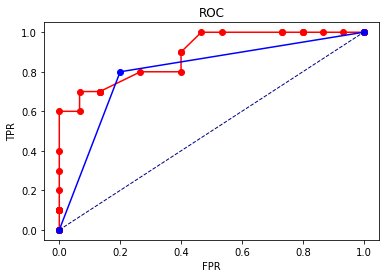

In [43]:
thresholds = np.linspace(-10, 10, 50)  # Feel free to modify this
fprs, tprs = roc(x_test, y_test, logreg, thresholds)  # pass in test dataset, fitted model, and thresholds of interest
skl_fpr, skl_tpr, _ = metrics.roc_curve(y_test, logreg.predict(x_test))

plt.plot(fprs, tprs, 'ro-')
plt.plot(skl_fpr, skl_tpr, 'bo-')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.title('ROC')

## Bonus:
How might you extend ROC to 3 classes? 4 or more? (short answer)

When extend ROC to multiclasses, the Confusion Matrix is also extended where the diagonal of the matrix contains the true positives and negatives of the binary results.  Because the Confusion Matrix is also extended, it contains all the important values to create the ROC graph and evaluate the model.